In [38]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import re
import nltk

In [42]:
from nltk.tag import DefaultTagger 
default_tagger = DefaultTagger('N')
frase = "uma frase qualquer".split()
default_tagger.tag(frase)

[('uma', 'N'), ('frase', 'N'), ('qualquer', 'N')]

In [39]:
# Carregar o corpus e pré-processar
s = open('./datasets/macmorpho-train.txt', 'r', encoding='utf-8').read()
s = re.split(r'\.+_PU', s)
s = [s0.strip() for s0 in s]
s = [re.split('\s+', s0) for s0 in s]
s = [ [ tuple(re.split('_', w0)) for w0 in p] for p in s]
s = [ [ w for w in p if len(w)==2 ] for p in s ] 
s = [ [ (w[0].lower(), w[1]) for w in p] for p in s ]
s = [p for p in s if len(p)>5]      
# s[frase][palavra] = (palavra, tipo)
print(s[0:2])

[[('jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('cr$', 'CUR'), ('1,4', 'NUM'), ('milhão', 'N'), ('na', 'PREP+ART'), ('venda', 'N'), ('da', 'PREP+ART'), ('pinhal', 'NPROP'), ('em', 'PREP'), ('são', 'NPROP'), ('paulo', 'NPROP')], [('programe', 'V'), ('sua', 'PROADJ'), ('viagem', 'N'), ('à', 'PREP+ART'), ('exposição', 'NPROP'), ('nacional', 'NPROP'), ('do', 'NPROP'), ('zebu', 'NPROP'), (',', 'PU'), ('que', 'PRO-KS'), ('começa', 'V'), ('dia', 'N'), ('25', 'N')]]


In [40]:
# Carregar o corpus de teste
# Carregar o corpus e pré-processar
s_ = open('./datasets/macmorpho-test.txt', 'r', encoding='utf-8').read()
s_ = re.split(r'\.+_PU', s_)
s_ = [s0.strip() for s0 in s_]
s_ = [re.split('\s+', s0) for s0 in s_]
s_ = [ [ tuple(re.split('_', w0)) for w0 in p] for p in s_]
#s = [ [ t for t in p if t[0] in vocab.keys() ] for p in s ]
s_ = [ [ w for w in p if len(w)==2 ] for p in s_ ] 
s_ = [ [ (w[0].lower(), w[1]) for w in p] for p in s_ ]
s_ = [p for p in s_ if len(p)>5]
# s[frase][palavra] = (palavra, tipo)

In [44]:
default_tagger.evaluate(s_)

0.214927757379238

In [1]:

frase = "São Paulo é uma cidade grande"
frase = "As pessoas são tão loucas"
print(tagger.tag(frase.lower().split()))


NameError: name 'tagger' is not defined

In [47]:
from nltk.tag import UnigramTagger
unigram_tagger = UnigramTagger(s, backoff=default_tagger)
unigram_tagger.evaluate(s_)

0.86343641218826

In [68]:
from nltk.tag import AffixTagger 
affix_tagger = AffixTagger(s, affix_length=-3, min_stem_length=2)
affix_tagger.evaluate(s_)

0.29652853941156837

In [28]:
from nltk.tag import BigramTagger
tagger = BigramTagger(s)
tagger.evaluate(s_)

0.294513852462925

In [17]:
#frase = "São Paulo é uma cidade grande"
frase = "As pessoas são tão loucas"
print(tagger.tag(frase.lower().split()))


[('as', 'ART'), ('pessoas', 'N'), ('são', 'V'), ('tão', 'ADV'), ('loucas', None)]


In [57]:
from nltk.tag import NgramTagger
ngram_tagger = NgramTagger(1, s)
ngram_tagger.evaluate(s_)


0.86343641218826

In [96]:
taggers = []
taggers.append(DefaultTagger('N'))

for n in range(3):
    taggers.append(NgramTagger(n+1, s, backoff=taggers[-1]))


In [97]:
acc = []
for t in taggers:
    acc.append(t.evaluate(s_))
print(acc)

[0.214927757379238, 0.8750357636736446, 0.8950097754041295, 0.8950157360164036]


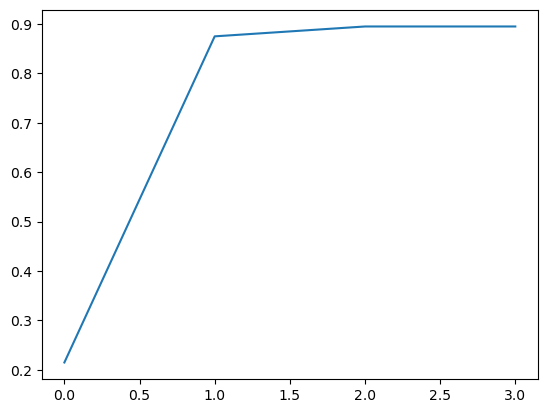

In [98]:
plt.figure()
plt.plot(np.arange(len(acc)), acc)
plt.show()

In [30]:
from nltk.tag import HiddenMarkovModelTagger
tagger = HiddenMarkovModelTagger()
tagger.evaluate(s_)

TypeError: __init__() missing 5 required positional arguments: 'symbols', 'states', 'transitions', 'outputs', and 'priors'

In [34]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
pos_tag("this is my testing sentence".split())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tiagoft1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [110]:
import nltk
nltk.download('gutenberg')


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\tiagoft1\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [117]:
full_gutenberg = [nltk.corpus.gutenberg.raw(f) for f in nltk.corpus.gutenberg.fileids()]
type(full_gutenberg[0])

str

In [118]:
dir (nltk.corpus.gutenberg)

['CorpusView',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_citation',
 '_encoding',
 '_fileids',
 '_get_root',
 '_license',
 '_para_block_reader',
 '_read_para_block',
 '_read_sent_block',
 '_read_word_block',
 '_readme',
 '_root',
 '_sent_tokenizer',
 '_tagset',
 '_unload',
 '_word_tokenizer',
 'abspath',
 'abspaths',
 'citation',
 'encoding',
 'ensure_loaded',
 'fileids',
 'license',
 'open',
 'paras',
 'raw',
 'readme',
 'root',
 'sents',
 'words']